CMP6202

# Objectives
In this lab you will:
* Revise basic univariate data analysis techniques to better understand how individual variables / attributes are distributed
*	Apply basic bivariate visualisation techniques to better identify the relationships between variables
* Perform imputation for missing values using methods such as dropna, SimpleImputer, and kNNImputer
* Implement the K-Nearest Neighbor(KNN) algorithm for data analysis and prediction



# Library imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a useful library for Data Visualisation
from statsmodels.graphics.mosaicplot import mosaic
import missingno as msno
from scipy.stats import skewnorm

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


## Heart Example

In [7]:
df_heart = pd.read_csv('../labData/Heart.csv')
df_heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [8]:
df_heart = df_heart.drop("Unnamed: 0",axis=1)

### Initial data checking

Let's describe all the attributes in our dataframe

In [9]:
df_heart.describe(include='all')

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
count,303.000000,303.000000,303,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301,303
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2
top,NaN,NaN,asymptomatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,No
freq,NaN,NaN,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166,164
mean,54.438944,0.679868,NaN,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,NaN,NaN
std,9.038662,0.467299,NaN,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,NaN,NaN
min,29.000000,0.000000,NaN,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,NaN,NaN
25%,48.000000,0.000000,NaN,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,NaN,NaN
50%,56.000000,1.000000,NaN,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,NaN,NaN
75%,61.000000,1.000000,NaN,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,NaN,NaN


Then let's check their data types

In [10]:
df_heart.dtypes

Age            int64
Sex            int64
ChestPain     object
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal          object
AHD           object
dtype: object

In [8]:
df_heart.dtypes

,0
Age,int64
Sex,int64
ChestPain,object
RestBP,int64
Chol,int64
Fbs,int64
RestECG,int64
MaxHR,int64
ExAng,int64
Oldpeak,float64


## Converting nominal target into binary encoding

In [11]:
le = LabelEncoder()
df_heart["AHD"] = le.fit_transform(df_heart["AHD"])

In [12]:
df_heart.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0


In [11]:
df_heart.dtypes

,0
Age,int64
Sex,int64
ChestPain,object
RestBP,int64
Chol,int64
Fbs,int64
RestECG,int64
MaxHR,int64
ExAng,int64
Oldpeak,float64


### EDA on the split data

#### Analysing the target variables

Let's start with analysing our target variable which would be "AHD" or 'Actual Heart Disease' in this case.

Based on a quick peek at the data types earlier we know that AHD will likely be a nominal / categorical variable due to being encoded as a string / object.

So to have a look at the "shape" of such a distribution we won't use a histogram or a boxplot but a **countplot**

<Axes: xlabel='AHD', ylabel='count'>

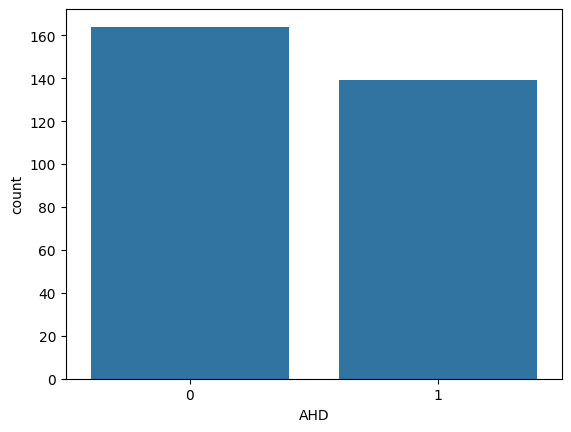

In [12]:
sns.countplot(data = df_heart, x = 'AHD')

What does this tell us about our data?

#### Analysing the feature variables

Let's remind ourselves of what variables / attributes we have

In [13]:
df_heart.columns

Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

##### Analysing Age

<Axes: xlabel='Age'>

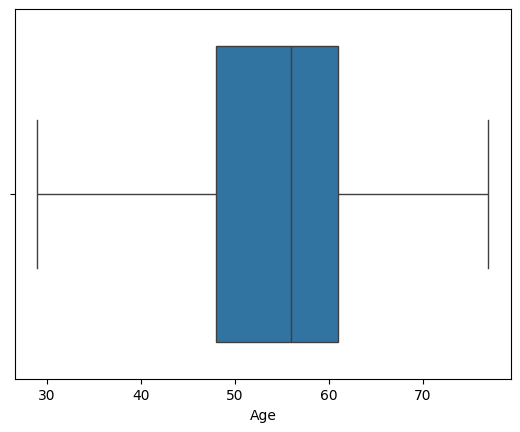

In [14]:
sns.boxplot(data = df_heart, x = 'Age')

What does this tell us about our data?
How else could we analyse this?

<Axes: xlabel='Age', ylabel='Count'>

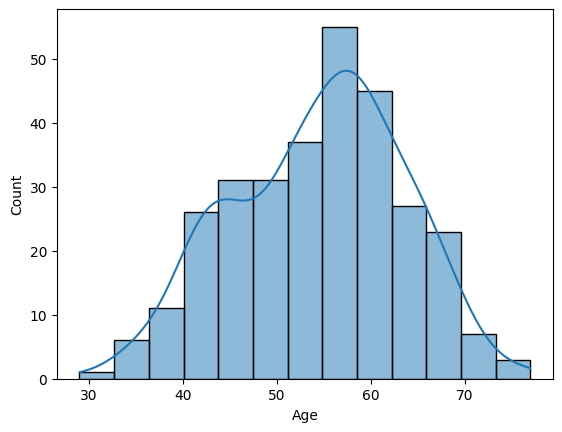

In [15]:
sns.histplot(data = df_heart, x = 'Age', kde = True)

What does this tell us about our data?
How else could we analyse this?



##### Analysing Sex

<Axes: xlabel='Sex', ylabel='count'>

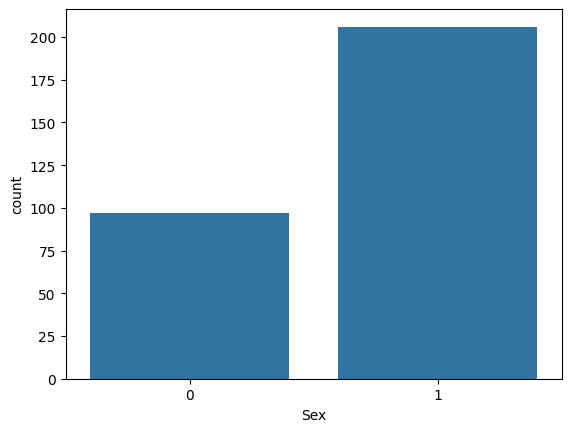

In [16]:
sns.countplot(data = df_heart, x = 'Sex')

What does this tell us about our data?
How else could we analyse this?

##### Analysing ChestPain

<Axes: xlabel='ChestPain', ylabel='count'>

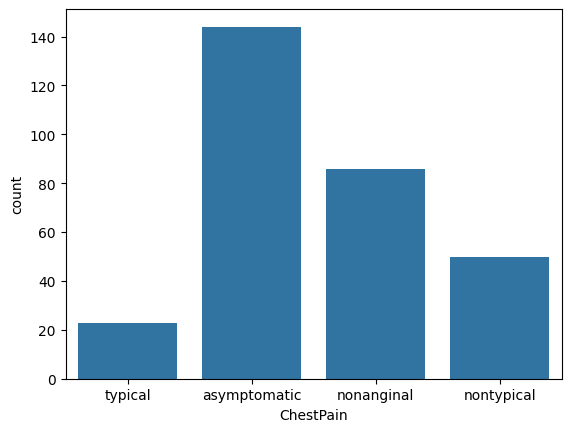

In [17]:
sns.countplot(data  = df_heart, x = 'ChestPain')

What does this tell us about our data?
How else could we analyse this?

##### Analysing RestBP

What does this tell us about our data?
How else could we analyse this?

##### Analysing Chol

<Axes: xlabel='Chol'>

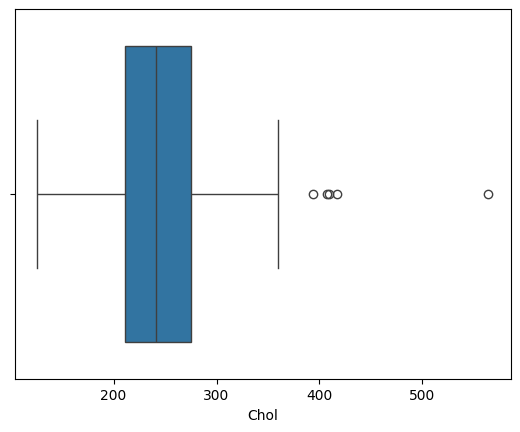

In [18]:
sns.boxplot(data  = df_heart, x = 'Chol')


What does this tell us about our data?
How else could we analyse this?

##### Analysing Fbs

<Axes: xlabel='Fbs', ylabel='count'>

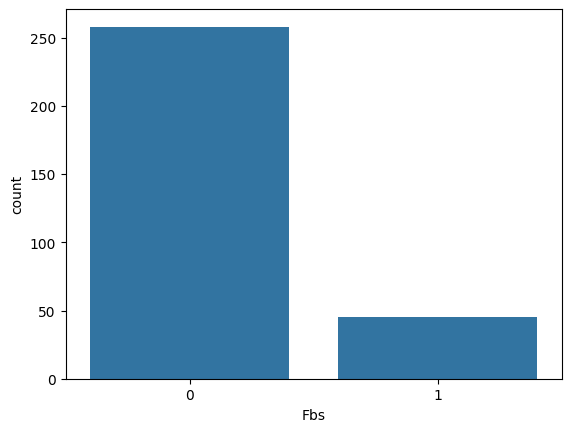

In [19]:
sns.countplot(data  = df_heart, x = 'Fbs')


What does this tell us about our data?
How else could we analyse this?

##### Analysing RestECG

<Axes: xlabel='RestECG', ylabel='count'>

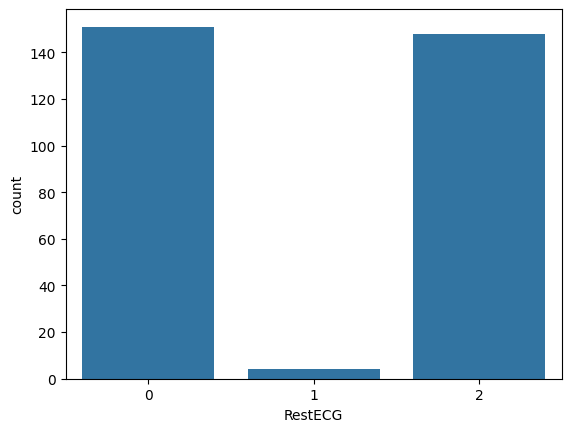

In [20]:
sns.countplot(data  = df_heart, x = 'RestECG')


What does this tell us about our data?
How else could we analyse this?

##### Analysing MaxHR

<Axes: xlabel='MaxHR'>

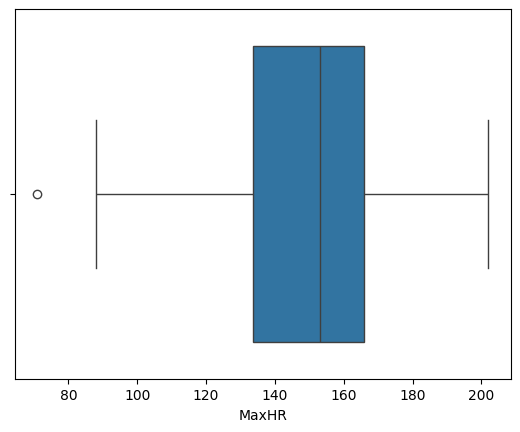

In [21]:
sns.boxplot(data  = df_heart, x = 'MaxHR')


What does this tell us about our data?
How else could we analyse this?

##### Analysing ExAng

<Axes: xlabel='ExAng', ylabel='count'>

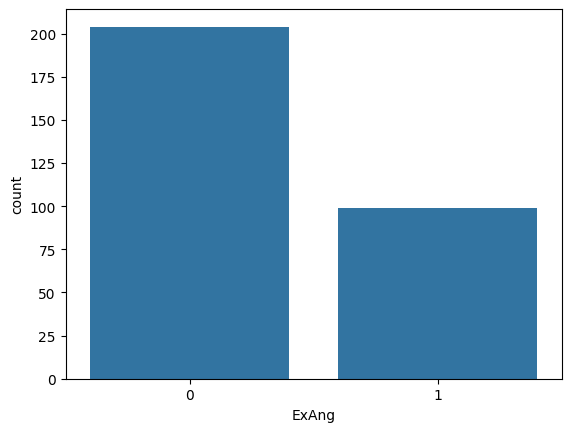

In [22]:
sns.countplot(data  = df_heart, x = 'ExAng')


What does this tell us about our data?
How else could we analyse this?

##### Analysing OldPeak

<Axes: xlabel='Oldpeak'>

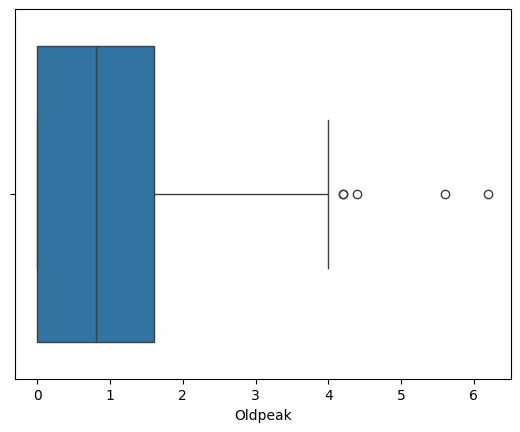

In [23]:
sns.boxplot(data  = df_heart, x = 'Oldpeak')


What does this tell us about our data?
How else could we analyse this?

##### Analysing Slope

What does this tell us about our data?
How else could we analyse this?

<Axes: xlabel='Slope', ylabel='count'>

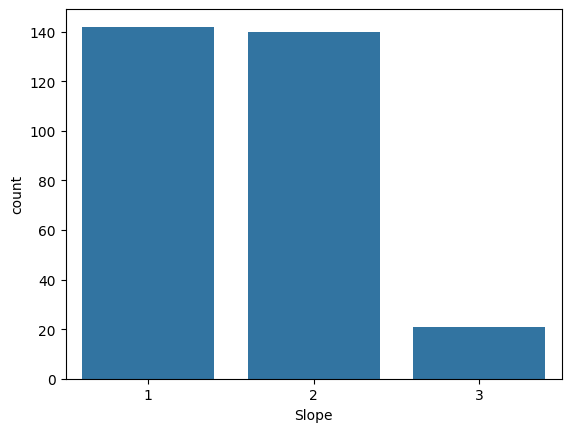

In [24]:
sns.countplot(data  = df_heart, x = 'Slope')


##### Analysing Ca

<Axes: xlabel='Ca', ylabel='count'>

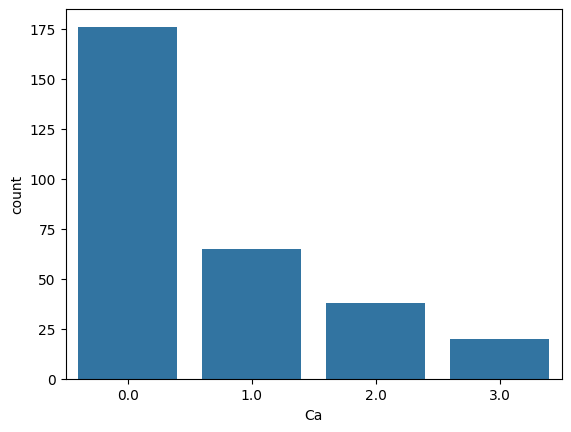

In [25]:
sns.countplot(data  = df_heart, x = 'Ca')


What does this tell us about our data?
How else could we analyse this?

##### Analysing Thal

<Axes: xlabel='Thal', ylabel='count'>

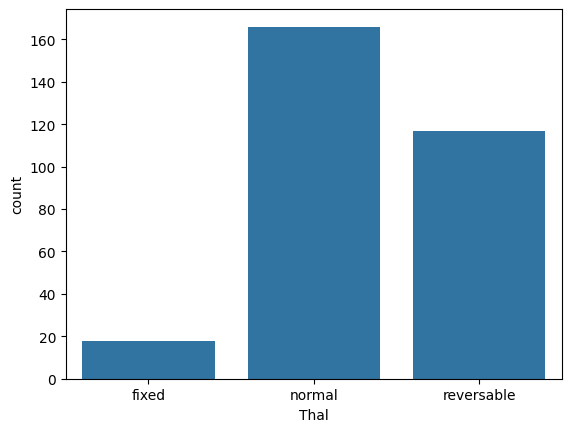

In [26]:
sns.countplot(data  = df_heart, x = 'Thal')



What does this tell us about our data?
How else could we analyse this?

#### Analysing the relationships between features and target

##### Analysing relationship of AHD with Age

<Axes: xlabel='AHD', ylabel='Age'>

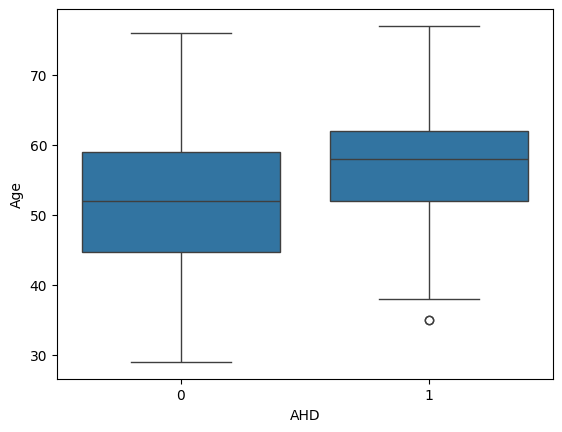

In [27]:

sns.boxplot(data  = df_heart, x = 'AHD', y="Age")


What does this tell us about our data?
How else could we analyse this?

##### Analysing relationship of AHD with Sex

<Axes: xlabel='Sex', ylabel='count'>

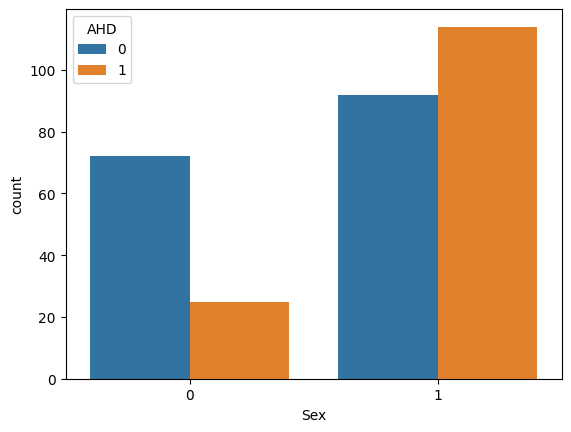

In [28]:

sns.countplot(data  = df_heart, x = 'Sex', hue="AHD")


What does this tell us about our data?
How else could we analyse this?

##### Analysing relationship of AHD with ChestPain

<Axes: xlabel='ChestPain', ylabel='count'>

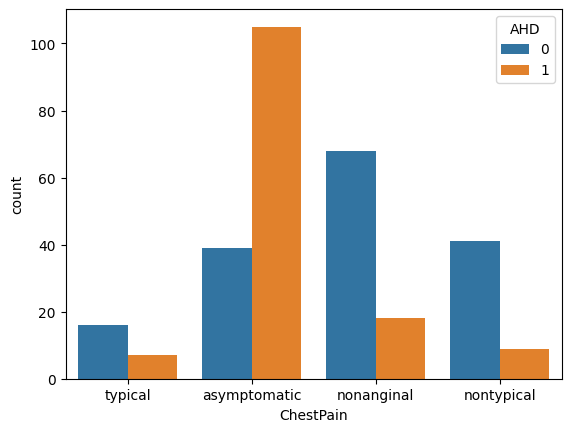

In [29]:

sns.countplot(data  = df_heart, x = 'ChestPain', hue="AHD")


What does this tell us about our data?
How else could we analyse this?

##### Analysing relationship of AHD with RestBP

<Axes: xlabel='AHD', ylabel='RestBP'>

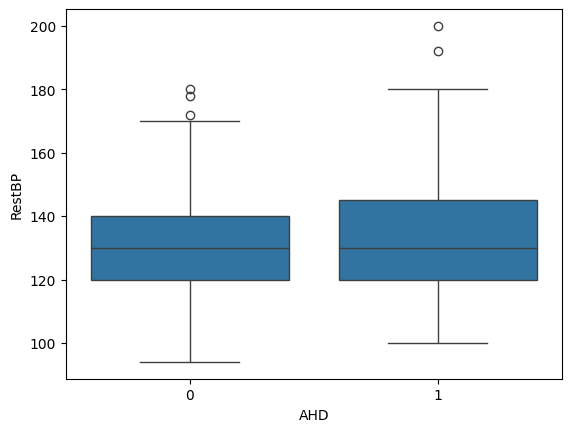

In [30]:
sns.boxplot(data  = df_heart, x = 'AHD', y="RestBP")


What does this tell us about our data?
How else could we analyse this?

##### Analysing relationship of AHD with Chol

<Axes: xlabel='AHD', ylabel='Chol'>

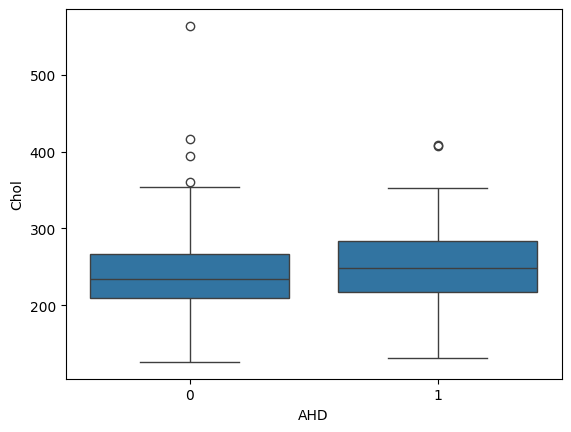

In [31]:

sns.boxplot(data  = df_heart, x = 'AHD', y="Chol")


What does this tell us about our data?
How else could we analyse this?

##### Analysing relationship of AHD with Fbs

<Axes: xlabel='Fbs', ylabel='count'>

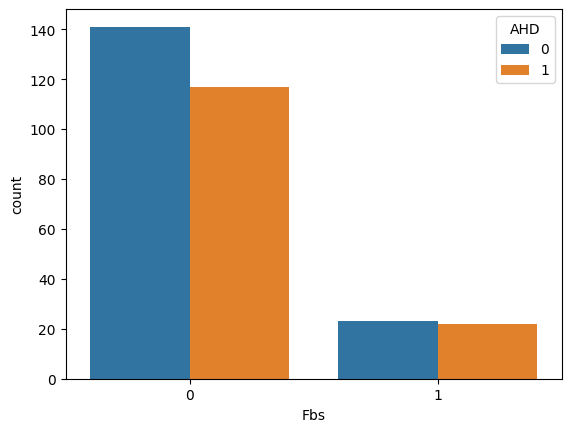

In [32]:
sns.countplot(data  = df_heart, x = 'Fbs', hue="AHD")


What does this tell us about our data?
How else could we analyse this?

<Axes: xlabel='AHD', ylabel='RestBP'>

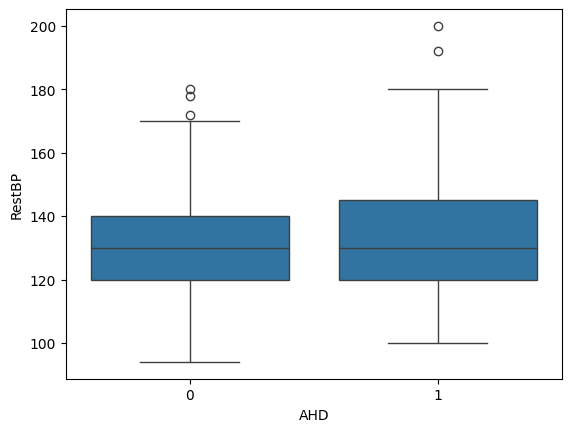

In [33]:
sns.boxplot(data  = df_heart, x = 'AHD', y="RestBP")

What does this tell us about our data?
How else could we analyse this?

##### Analysing relationship of AHD with RestECG

<Axes: xlabel='RestECG', ylabel='count'>

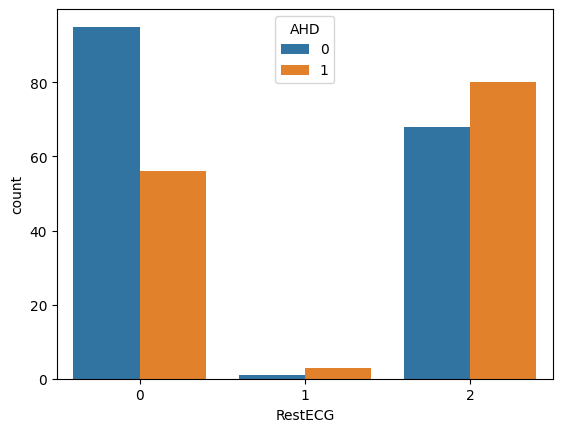

In [34]:
sns.countplot(data  = df_heart, x = 'RestECG', hue="AHD")

What does this tell us about our data?
How else could we analyse this?

##### Analysing relationship of AHD with MaxHR

<Axes: xlabel='AHD', ylabel='MaxHR'>

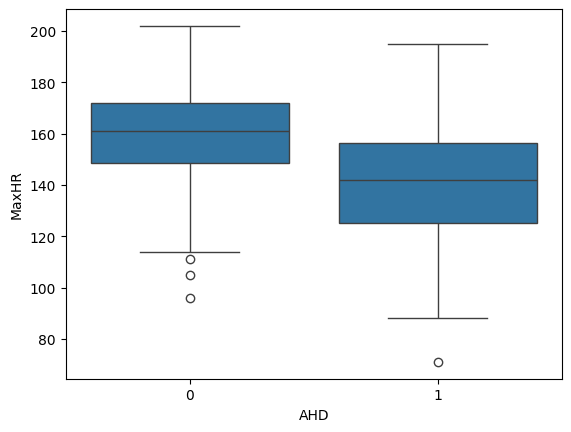

In [35]:
sns.boxplot(data  = df_heart, x = 'AHD', y="MaxHR")

What does this tell us about our data?
How else could we analyse this?

##### Analysing relationship of AHD with ExAng

<Axes: xlabel='ExAng', ylabel='count'>

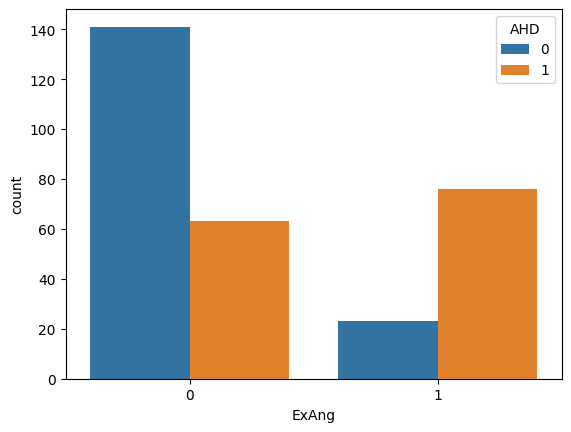

In [36]:
sns.countplot(data  = df_heart, x = 'ExAng', hue="AHD")

What does this tell us about our data?
How else could we analyse this?

##### Analysing relationship of AHD with OldPeak

<Axes: xlabel='AHD', ylabel='Oldpeak'>

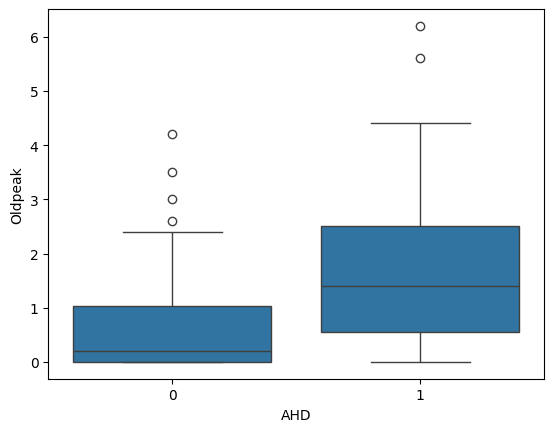

In [37]:
sns.boxplot(data  = df_heart, x = 'AHD', y="Oldpeak")

What does this tell us about our data?
How else could we analyse this?

##### Analysing relationship of AHD with Slope

<Axes: xlabel='Slope', ylabel='count'>

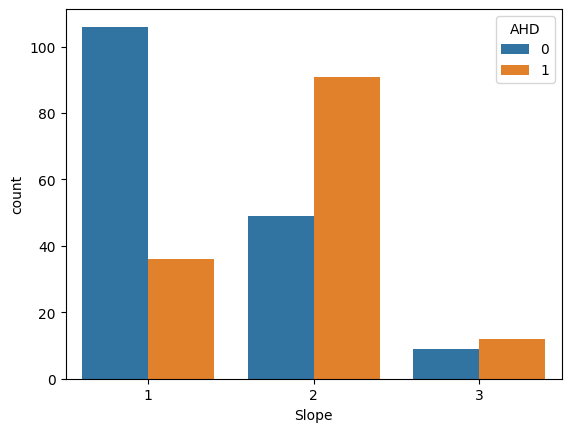

In [38]:
sns.countplot(data  = df_heart, x = 'Slope', hue="AHD")


What does this tell us about our data?
How else could we analyse this?

##### Analysing relationship of AHD with Ca

<Axes: xlabel='Ca', ylabel='count'>

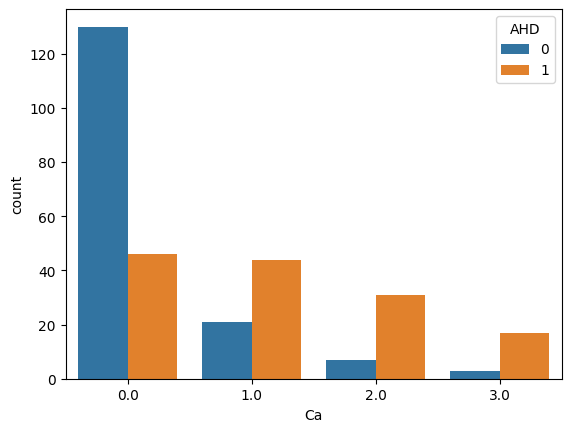

In [39]:
sns.countplot(data  = df_heart, x = 'Ca', hue="AHD")


<Axes: xlabel='count', ylabel='Ca'>

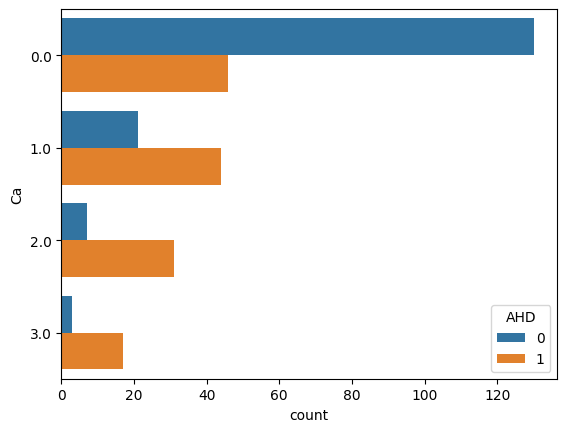

In [40]:
sns.countplot(data  = df_heart, y = 'Ca', hue="AHD")


What does this tell us about our data?
How else could we analyse this?

##### Analysing relationship of AHD with Thal

<Axes: xlabel='Thal', ylabel='count'>

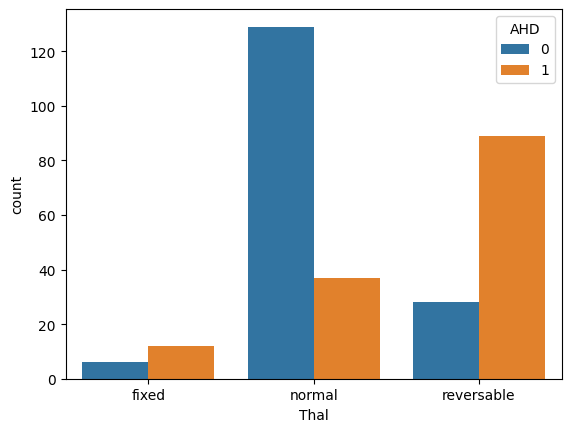

In [41]:
sns.countplot(data  = df_heart, x = 'Thal', hue="AHD")

What does this tell us about our data?
How else could we analyse this?

#### Analysing the relationships between features and features

In [42]:
features_corr_check = ['Age', 'RestBP', 'Chol', 'Fbs', 'MaxHR', 'Oldpeak']

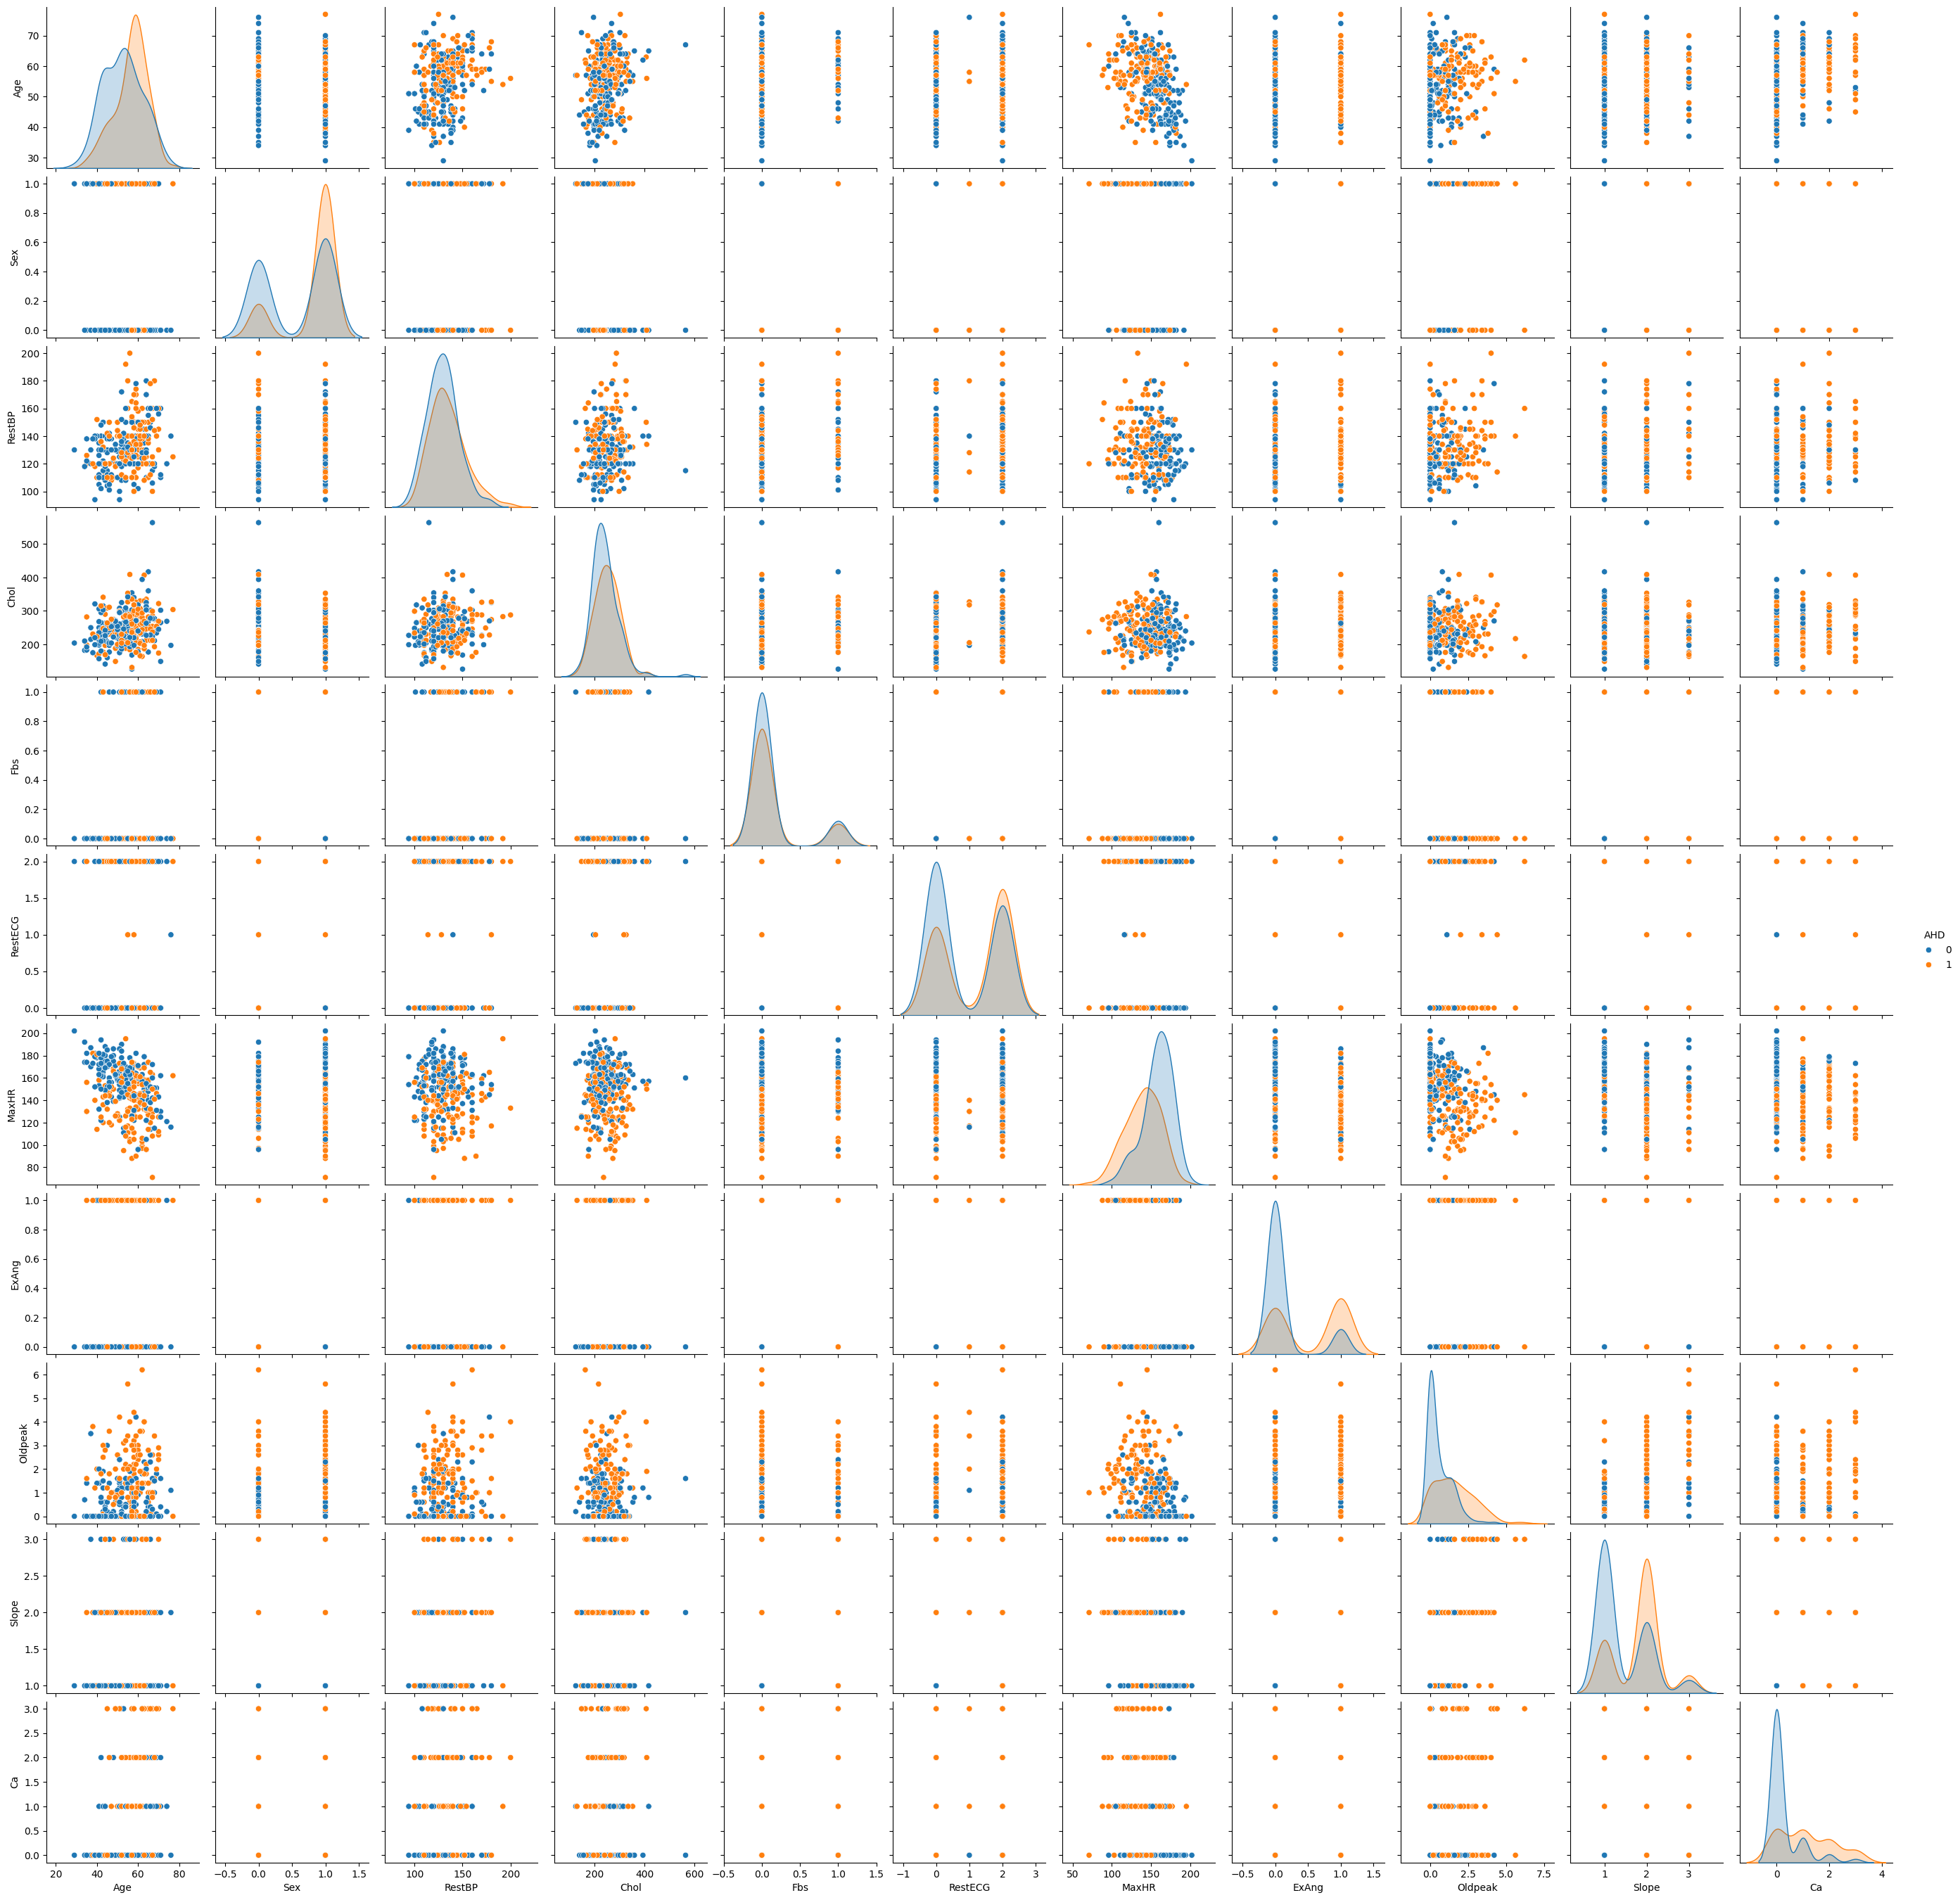

In [43]:
sns.pairplot(df_heart, hue='AHD')

In [44]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols = df_heart.select_dtypes(include=numerics).columns
num_cols

Index(['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng',
       'Oldpeak', 'Slope', 'Ca', 'AHD'],
      dtype='object')

In [52]:
df_heart = df_heart[num_cols]

In [53]:
df_heart_corr = df_heart.corr(method='pearson')
df_heart_corr

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD
Age,1.000000,-0.097542,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.362605,0.223120
Sex,-0.097542,1.000000,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.093185,0.276816
RestBP,0.284946,-0.064456,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098773,0.150825
Chol,0.208950,-0.199915,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.119000,0.085164
Fbs,0.118530,0.047862,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.145478,0.025264
RestECG,0.148868,0.021647,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.128343,0.169202
MaxHR,-0.393806,-0.048663,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.264246,-0.417167
ExAng,0.091661,0.146201,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145570,0.431894
Oldpeak,0.203805,0.102173,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.295832,0.424510
Slope,0.161770,0.037533,0.117382,-0.004062,0.059894,0.133946,-0.385601,0.257748,0.577537,1.000000,0.110119,0.339213


What does this tell us about our data?
How else could we analyse this?

<Axes: >

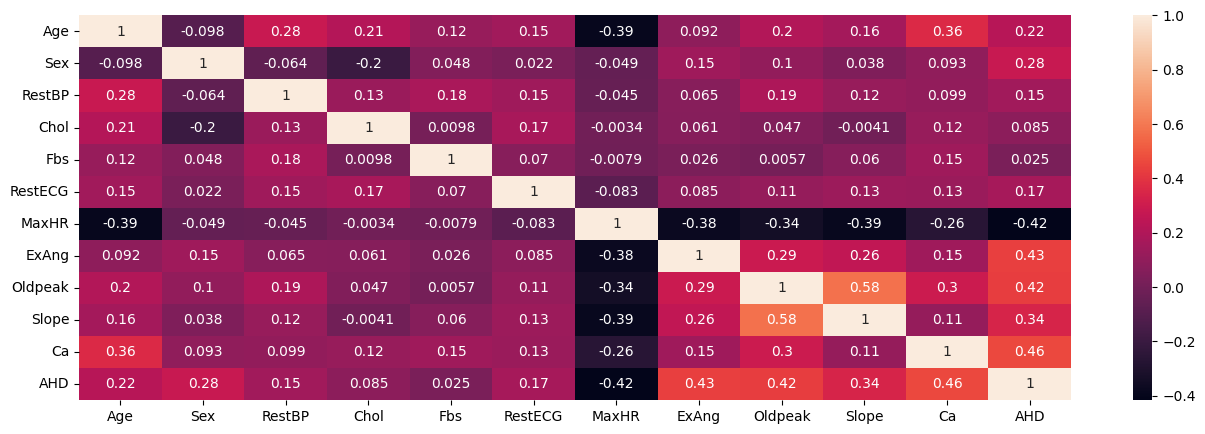

In [54]:
plt.figure(figsize = (16,5))
sns.heatmap(df_heart_corr,annot=True)

What does this tell us about our data?
How else could we analyse this?

### Pre-processing for training

#### Dealing with Missing Data in the Training set

In [85]:
df_heart = pd.read_csv('/content/drive/MyDrive/CMP6202/datasets/Heart.csv')


In [86]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [87]:
df_heart.isna().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0


We can also use the [Missingno](https://github.com/ResidentMario/missingno) library to provide some nice visualisations of our data and check for missing values.

<Axes: >

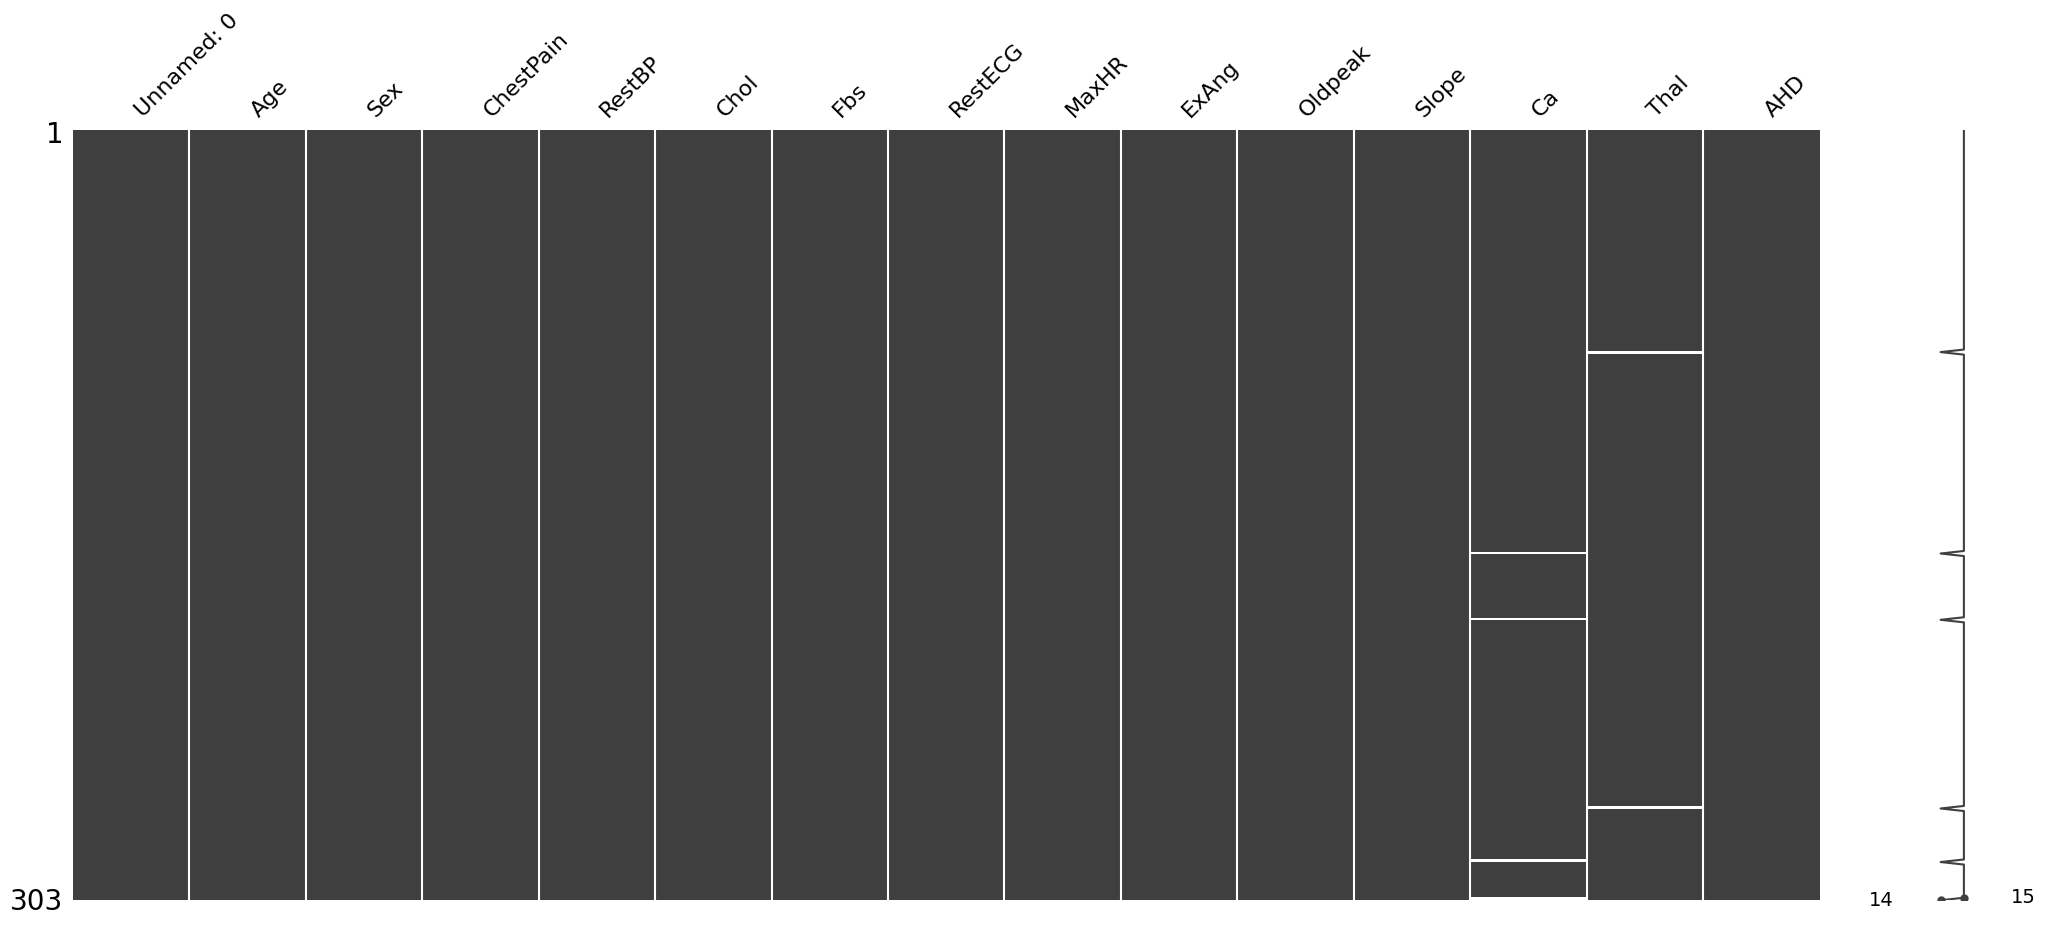

In [88]:
msno.matrix(df_heart)

What does this tell us about our data?
How else could we analyse this?

# Imputation for missing values

Many Machine Learning algorithms require that their input data contains no missing values, in that case what do we do when we have a record that contains some missing values for specific attributes / columns?

One way would be to simply eliminate those records that contain missing values from our dataset entirely - but this can introduce its own problems as we are potentially throwing away valuable data!

Another possible solution is to replace the missing values with a reasonable alternative based on some aspects of the particular variable in question.

We call this [imputation](https://scikit-learn.org/stable/modules/impute.html).

In [89]:
from sklearn.impute import SimpleImputer

In [90]:
col1= [1.0, 2.0, np.NaN, 4.0, 4.0]
col2 = [5.0, np.NaN, 4.0, 7.0, 5.0]

In [91]:
frame = {'Column1'  : col1,
         'Column2' : col2}

In [92]:
df = pd.DataFrame(frame)

In [93]:
df.head()

,Column1,Column2
0,1.0,5.0
1,2.0,NaN
2,NaN,4.0
3,4.0,7.0
4,4.0,5.0


1. ### Utilise the '*df.dropna()*' method to efficiently eliminate rows containing NaN values from the DataFrame

In [94]:
df.dropna()

,Column1,Column2
0,1.0,5.0
3,4.0,7.0
4,4.0,5.0


2. ### SimpleImputer is Univariate imputer that offers straightforward strategies for efficiently filling in missing values in your data.

In [95]:
imp_mean = SimpleImputer(strategy= 'mean')
# strategy : 'mean' or 'median' or 'constant
imp_mean.fit_transform(df)

array([[1.  , 5.  ],
       [2.  , 5.25],
       [2.75, 4.  ],
       [4.  , 7.  ],
       [4.  , 5.  ]])

In [96]:
# Specify a constant value
imp_constant = SimpleImputer(strategy= 'constant', fill_value = 1 )
imp_constant.fit_transform(df)

array([[1., 5.],
       [2., 1.],
       [1., 4.],
       [4., 7.],
       [4., 5.]])

In [97]:
# ?SimpleImputer

In [98]:
# 'add_indicator' = True, 1 means we imputed this place by a value
imp_constant = SimpleImputer (strategy= 'constant', fill_value = 1,
                              add_indicator= True)

In [99]:
imp_constant.fit_transform(df)

array([[1., 5., 0., 0.],
       [2., 1., 0., 1.],
       [1., 4., 1., 0.],
       [4., 7., 0., 0.],
       [4., 5., 0., 0.]])

3. ## KNN imputer is a powerful tool for addressing missing data by leveraging the K-Nearest Neighbor algorithm to intelligently complete missing values with sophisticated strategies.

In [100]:
from sklearn.impute import KNNImputer

In [101]:
knn_imp = KNNImputer(n_neighbors=1)

In [102]:
knn_imp.fit_transform(df)

array([[1., 5.],
       [2., 5.],
       [1., 4.],
       [4., 7.],
       [4., 5.]])

### Let's begin by applying a simple imputer or any other imputation technique to the [Heart.csv](https://moodle.bcu.ac.uk/mod/resource/view.php?id=8493833) dataset. After that, we will proceed to construct K-Nearest Neighbor (KNN) algorithms, followed by the training and evaluation of the models.

In [103]:
df_heart.isna().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0


In [104]:
df_heart.dtypes

,0
Unnamed: 0,int64
Age,int64
Sex,int64
ChestPain,object
RestBP,int64
Chol,int64
Fbs,int64
RestECG,int64
MaxHR,int64
ExAng,int64


In [105]:
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer

SimpleImputer()

In [106]:
df_heart ['Ca'] = imputer.fit_transform(df_heart[['Ca']])

In [107]:
df_heart.isna().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0


In [108]:
df_heart.dropna(inplace = True)

In [109]:
df_heart.shape

(301, 15)

In [110]:
df_heart.isna().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0


# LabelEncoding

* Now, let's apply the LabelEncoder to the categorical columns that contains string values. This will help us encode these columns into numerical representations for the further analysis.

In [111]:
df_heart.dtypes

,0
Unnamed: 0,int64
Age,int64
Sex,int64
ChestPain,object
RestBP,int64
Chol,int64
Fbs,int64
RestECG,int64
MaxHR,int64
ExAng,int64


In [112]:
le = LabelEncoder()

In [113]:
df_heart.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [114]:
df_heart['ChestPain'].value_counts()

,count
ChestPain,
asymptomatic,143
nonanginal,85
nontypical,50
typical,23


In [115]:
df_heart['Thal'].value_counts()

,count
Thal,
normal,166
reversable,117
fixed,18


In [116]:
df_heart['ChestPain'] = le.fit_transform(df_heart['ChestPain'])
df_heart['Thal'] = le.fit_transform(df_heart['Thal'])

In [117]:
df_heart.dtypes

,0
Unnamed: 0,int64
Age,int64
Sex,int64
ChestPain,int64
RestBP,int64
Chol,int64
Fbs,int64
RestECG,int64
MaxHR,int64
ExAng,int64


In [118]:
df_heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,No
1,2,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,Yes
2,3,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,Yes
3,4,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,No
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,No


## Model training

### Creating a train / test split

Let's create a train / test split of our Heart disease prediction data set.

Why would we split our data right at the beginning before we have done any exploratory data analysis, and well before we are looking at training our model?

Well the answer is simple, it all comes down to differentiating between **seen** and **unseen** data.

We have seen previously that the purpose behind splitting our data into **training** and **testing** sets is to have one set of data (the **"seen" training data**) that can be used for **developing our models** and another set of data (the **"unseen" testing data**) that allows us to **evaluate how well our model performs on data that it has not yet encountered**.

Splitting them into one data set for "learning" the patterns in the data and a separate one that acts as an examination of how well it has understood those patterns is very important because we want to minimise the chance of having **biased evaluation results**.

But the important thing to note here is that it isn't just the data we feed into the model directly during training that could bias how the model is developed, it is also data that we have seen as the Data Scientists / Machine Learning Engineers analysing it. By performing Exploratory Data Analysis on your whole dataset to start off with **you are already introducing bias into your experimental process** because the insights that you gain from the exploratory process are not just the data that should be **seen** (the training examples used to develop the model) but also the data that should be **unseen** (the test examples that represent "real world" data that has not been encountered yet by the model).

Further discussions on this topic can be found [here](https://stackoverflow.com/questions/54282411/machine-learning-project-split-training-test-sets-before-or-after-exploratory-d), [here](https://machinelearningmastery.com/data-preparation-without-data-leakage/), and [here](https://www.analyticsvidhya.com/blog/2021/07/data-leakage-and-its-effect-on-the-performance-of-an-ml-model/)

In [119]:
# We'll now use the train-test splitter inside the SKLearn package to give us two subsets of data
# one for training and one for testing, divided into the
# features (the X values) and the targets (the Y values)
# the \ allows us to have a line break in the code

X = df_heart.drop(columns= "AHD",  axis=1)
y = df_heart['AHD']
X_train, X_test, y_train, y_test = \
  train_test_split(X, y,test_size = 0.2, random_state=42)



In [120]:
X_test.shape

(61, 14)

In [121]:
X_test.isna().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0


# MinMax Scaler
After encoding the dataset and spliting it into X_train, X_test, y_train, y_test, we'll proceed by applying either MinMax Scaler or Standard Scaler to standardise the feature values. This standardization step is essential to prepare the data for building K-Nearest Neighbor (KNN) alogrithm and conducting model training and evaluation on the Heart dataset.

In [122]:
from sklearn.preprocessing import MinMaxScaler

In [123]:
scaler = MinMaxScaler()

In [124]:
X_train_scaled = scaler.fit_transform(X_train)

In [125]:
X_train_scaled.shape

(240, 14)

In [126]:
X_test_scaled = scaler.transform(X_test)

In [127]:
# X_test_scaled

### Making a simple KNN classifier


Let's now try to create a simple K-nearest neighbors classifier model.

Further information about this algorithm can be found in the official SKLearn documentation [here](https://scikit-learn.org/stable/modules/neighbors.html)

In [128]:
from sklearn.neighbors import KNeighborsClassifier

In [129]:
knn_clf = KNeighborsClassifier(n_neighbors= 5)


In [130]:
knn_clf.fit(X_train_scaled, y_train)

KNeighborsClassifier()

## Model Evaluation

### Checking training results

Let's get the prediction results for our classifiers, checking **how well they perform on data that has already been seen** (the training set).

In [131]:
y_pred = knn_clf.predict(X_test_scaled)

Then we want to have a look at how well the classifiers have performed, one data structure we can use for this is a [confusion matrix](https://developers.google.com/machine-learning/crash-course/classification/true-false-positive-negative).

Which will give us the amount of values for:
*   True Positives
*   False Positives
*   True Negatives
*   False Negatives





In [132]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[30, 11],
       [ 4, 16]])

In [133]:
# ?sns.heatmap

<Axes: >

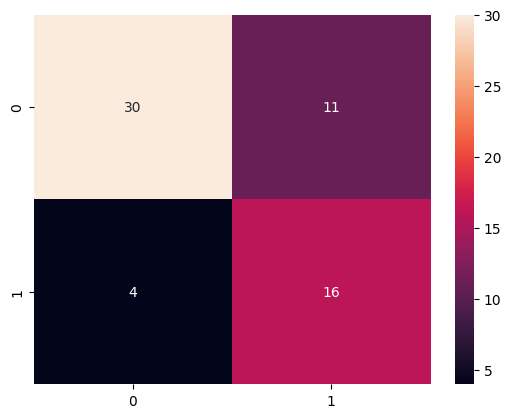

In [134]:
sns.heatmap(cm, annot= True)


The KNN has some false negatives and false positives when predicting on the training set

Let's now have a look at the training [Accuracy](https://developers.google.com/machine-learning/crash-course/classification/accuracy) of our models. Accuracy is just one metric that we use to measure the performance of our models, and in fact can give an [incomplete picture](https://tryolabs.com/blog/2013/03/25/why-accuracy-alone-bad-measure-classification-tasks-and-what-we-can-do-about-it) of the performance of your model on its own

In [135]:
print(accuracy_score(y_pred, y_test))

0.7540983606557377


We can use the classification_report function on the metrics module to provide a more detailed picture of our classification scores.

In particular this will provide us with additional useful metrics, in particular: [precision, recall and F1-score](https://mlu-explain.github.io/precision-recall/)

In [136]:
print("KNN classification:")
print(classification_report(y_pred, y_test))

KNN classification:
              precision    recall  f1-score   support

          No       0.88      0.73      0.80        41
         Yes       0.59      0.80      0.68        20

    accuracy                           0.75        61
   macro avg       0.74      0.77      0.74        61
weighted avg       0.79      0.75      0.76        61



### Checking testing results

Checking the performance of our models against data they have already seen is all well and good, but it doesn't really provide us with an unbiased means of measuring the quality of the predictions on data that has not been seen before. To do this we will use our **testing** dataset to attempt to minimise bias in our evaluation of the Machine Learning models we've produced.

If we try to use our previously created existing test set (before pre-processing) we will end up with a number of errors.

# Exercises

## Exercise 1
One of the ways of dealing with missing values in a data set is to **impute** them.

What does imputation of data mean in the context of Machine Learning?

## Exercise 2

We use the SimpleImputer class what other methods of imputation are available based on whether we wish to perform Univariate or Multivariate imputation?

Further information about imputation can be found in the ScikitLearn documentation [here](https://scikit-learn.org/stable/modules/impute.html#impute)

## Exercise 3
Using the [documentation](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute) for SimpleImputer, what other imputation strategies could be used when we are preprocessing the Heart dataset than what we have used previously?

Try each of them and:
1.   Discuss what effect it has on the data after imputation
2.   Discuss what effect (if any) it has on the model training and evaluation process



## Exercise 4
An additional technique used during the preprocessing stage is the [transformation of numerical features](https://developers.google.com/machine-learning/data-prep/transform/transform-numeric) (e.g. interval or ratio data) using [Scaling techniques](https://en.wikipedia.org/wiki/Feature_scaling) on our features.

* [When to perform feature scaling](https://www.atoti.io/articles/when-to-perform-a-feature-scaling/)
* [Why Data Scaling is important in Machine Learning & How to effectively do it](https://analyticsindiamag.com/why-data-scaling-is-important-in-machine-learning-how-to-effectively-do-it/)

Using the above information, and that provided in the [Scikit Learn documentation](https://scikit-learn.org/stable/modules/preprocessing.html) consider which features in the Heart disease prediction dataset might benefit from Scaling, scale those features and assess the impact these changes on the model training process and model evaluation results

# Additional Challenges

* Please assess the previously mentioned KNN using a dataset of your own choice, such as the [breast_cancer](https://moodle.bcu.ac.uk/mod/resource/view.php?id=8493834) dataset.
* [Link](https://www.kaggle.com/code/prashant111/knn-classifier-tutorial/notebook)